In [1]:
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
BMS = pd.read_csv("C:\\AI(ml&dl)\\jupiter(machine learning)\\Projetcs(ML)\\24_MarketBasketAnalysisusingECLAT\\dataset1.csv")
BMS.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


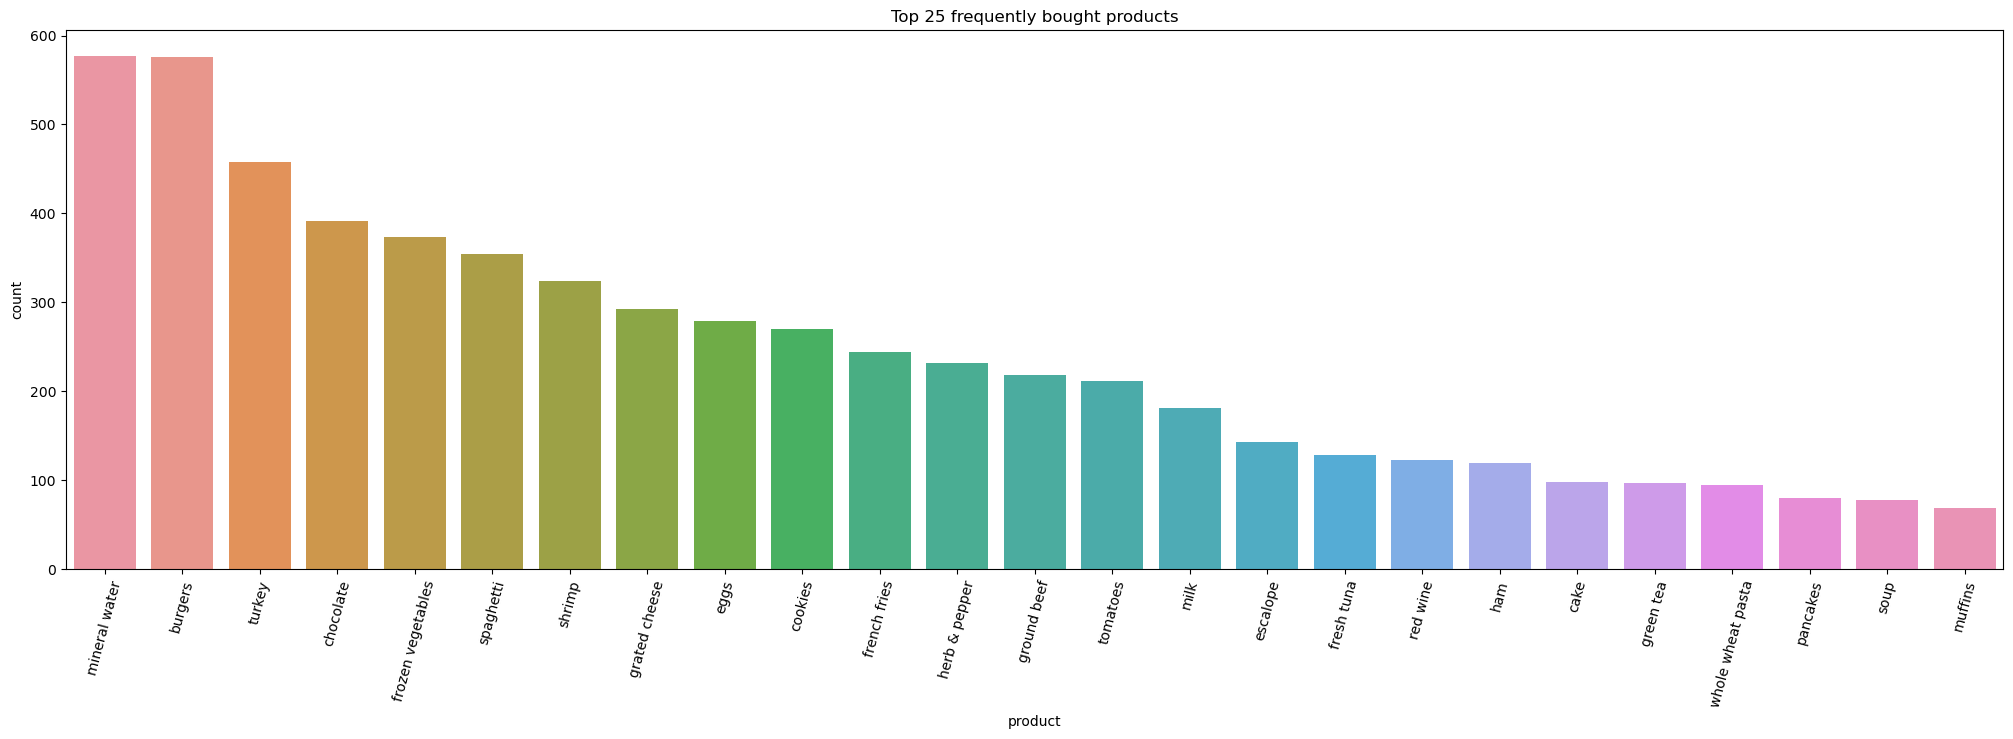

In [9]:
plt.rcParams['figure.figsize']=25,7
sns.countplot(data=BMS, x = BMS['shrimp'], order = BMS['shrimp'].value_counts().head(25).index)
plt.xticks(rotation = 75)
plt.xlabel('product')
plt.title('Top 25 frequently bought products')
plt.show()

In [10]:
BMS.shape

(7500, 20)

In [11]:
transactions = []
for i in range(0,7500):
    transactions.append([str(BMS.values[i,j]) for j in range(0,20)])
transactions

[['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['low fat yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole wheat pasta',
  

In [20]:
rules = apriori(transactions = transactions, min_support = 0.003, min_confidence = 0.2,min_lift=3,min_lengt= 2,max_length = 2)
rules

<generator object apriori at 0x000002579C3273C0>

In [21]:
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.0033333333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confiden

In [22]:
lhs = [tuple(result[2][0][0])[0] for result in results]
rhs = [tuple(result[2][0][1])[0] for result in results]
supports = [result[1] for result in results]
confidences = [result[2][0][2] for result in results]
lifts = [result[2][0][3] for result in results]
df = pd.DataFrame(zip(lhs,rhs,supports,confidences,lifts),columns=['Left Hand Side','Right Hand Side','Support','Confidence','lift'])
df



,Left Hand Side,Right Hand Side,Support,Confidence,lift
0,light cream,chicken,0.004533,0.290598,4.843305
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790327
2,pasta,escalope,0.005867,0.372881,4.700185
3,fromage blanc,honey,0.003333,0.245098,5.178128
4,herb & pepper,ground beef,0.016000,0.323450,3.291555
5,tomato sauce,ground beef,0.005333,0.377358,3.840147
6,light cream,olive oil,0.003200,0.205128,3.120612
7,whole wheat pasta,olive oil,0.008000,0.271493,4.130221
8,pasta,shrimp,0.005067,0.322034,4.514494


In [24]:
df.nlargest(n=10,columns = 'Support')

,Left Hand Side,Right Hand Side,Support,Confidence,lift
4,herb & pepper,ground beef,0.016000,0.323450,3.291555
7,whole wheat pasta,olive oil,0.008000,0.271493,4.130221
2,pasta,escalope,0.005867,0.372881,4.700185
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790327
5,tomato sauce,ground beef,0.005333,0.377358,3.840147
8,pasta,shrimp,0.005067,0.322034,4.514494
0,light cream,chicken,0.004533,0.290598,4.843305
3,fromage blanc,honey,0.003333,0.245098,5.178128
6,light cream,olive oil,0.003200,0.205128,3.120612
